<div style="border:solid green 2px; padding: 20px">
    
<b>Ратмир, привет!</b> Мы рады тебя видеть на территории код-ревьюеров. Ты проделал большую работу над проектом, но давай познакомимся и сделаем его еще лучше! У нас тут своя атмосфера и несколько правил:


1. Меня зовут Александр Матвеевский. Я работаю код-ревьюером, моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать аналитиком данных.
2. Общаемся на ты.
3. Если хочешь написать, спросить - не нужно стесняться. Только выбери свой цвет для комментария.  
4. Это учебный проект, тут можно не бояться сделать ошибку.  
5. У тебя неограниченное количество попыток для сдачи проекта.  
6. Let's Go!

---

Я буду красить комментарии цветом, пожалуйста, не удаляй их:

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Такой комментарий нужно исправить обязательно, он критически влияет на удачное выполнение проекта.
</div>
    
---

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__


Такой комментарий является рекомендацией или советом. Можешь использовать их на своё усмотрение.
</div>

---

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Такой комментарий  говорит о том, что было сделано что-то качественное и правильное =)
</div>
    
---
    
Предлагаю работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комментарии — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:   
    
<div class="alert alert-info"> <b>Комментарии студента:</b> Например, вот так.</div>
    
Всё это поможет выполнить повторную проверку твоего проекта оперативнее. Если будут какие-нибудь вопросы по моим комментариям, пиши, будем разбираться вместе :)    
    
---

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__


Отличная практика - расписывать цель и основные этапы своими словами (этот навык очень поможет на фильнальном проекте). Хорошо было бы добавить ход и цель исследования. Вот мой личный пример: 
    
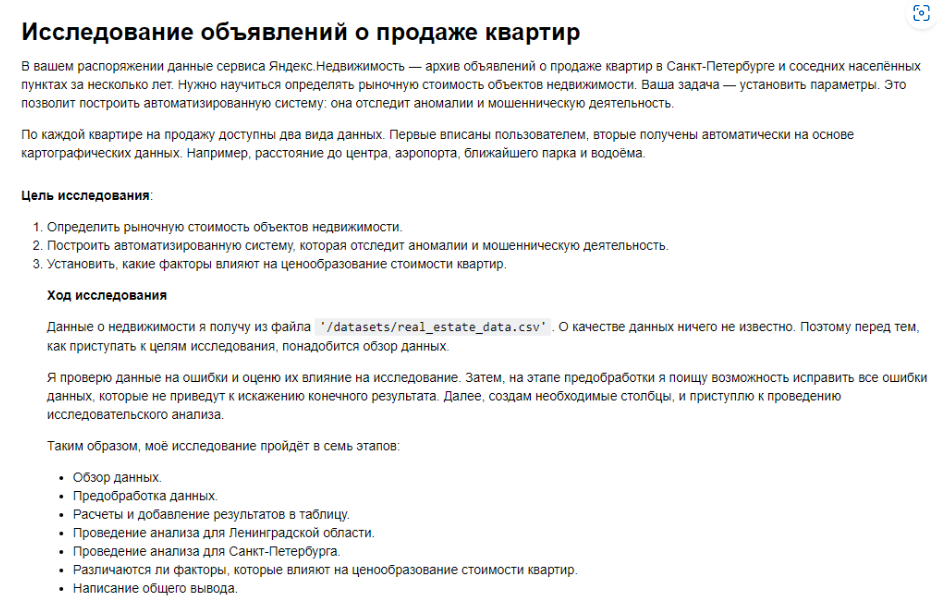
</div>

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [2]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

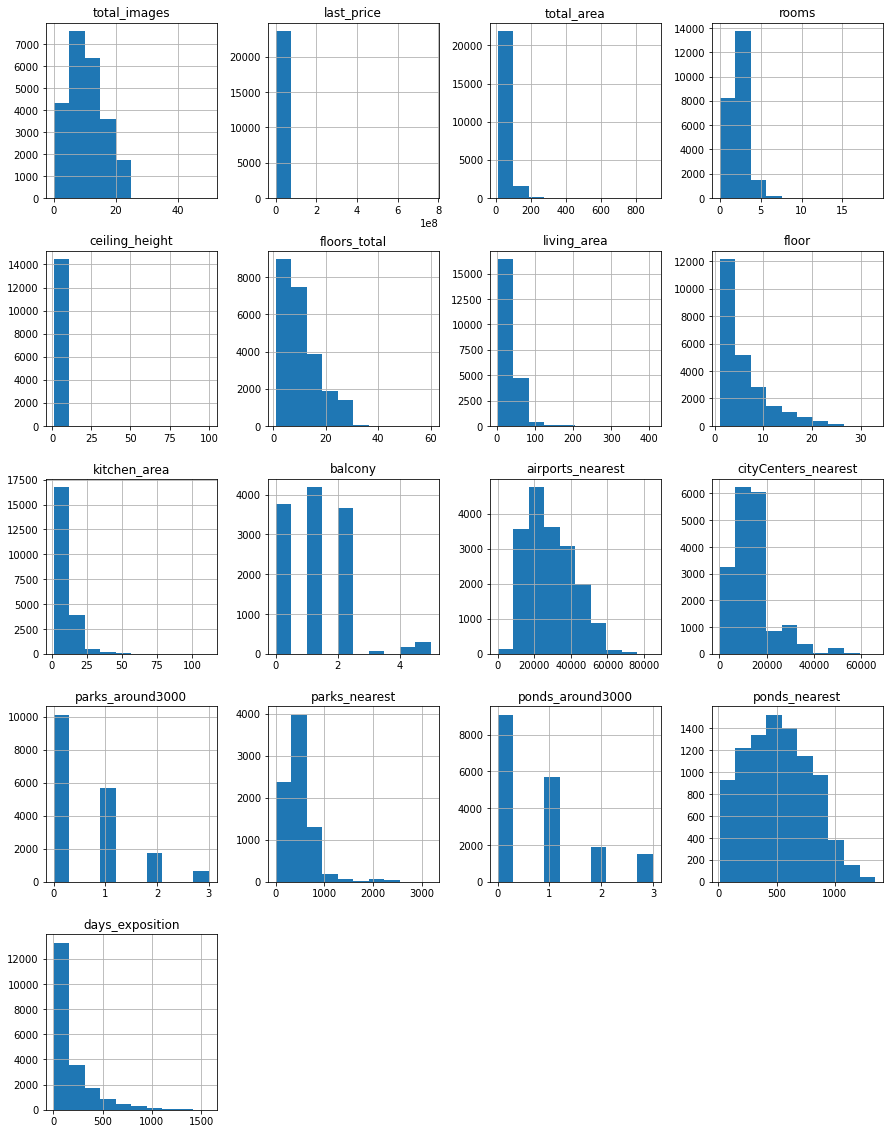

In [5]:
data.hist(figsize=(15, 20));

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Нет решения по шагу 1.3 (гистограммы). Поправь, пожалуйста
</div>

***Вывод***<br>

Изучив данные мы приходим к выводу, что в данных есть множество пропусков, которые надо заполнить. К тому же вызывают сомнения некоторые типы в столбцах, которые надо поменять.

<div class="alert alert-block alert-success">✔️
    
__Комментарий от ревьюера №2__
    
Отлично! Первый взгляд на данные есть, план намечен.

### Предобработка данных

In [6]:
#количество пропусков в %
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Проверить колличество пропусков в % можно вот так: 
    
    
    pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')

***В первую очередь приведем таблицу с датой к удобному формату***

In [7]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

***Займемся пропусками в ceiling_height***

In [8]:
data['ceiling_height'].describe()

#заполним пропуски значением медианы
data['ceiling_height'] = data['ceiling_height'].fillna(2.6)
#data.isna().sum()

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Некоторые столбцы можно поменять на значения, относительно своего района (например высота пололков). Вот так
    
    
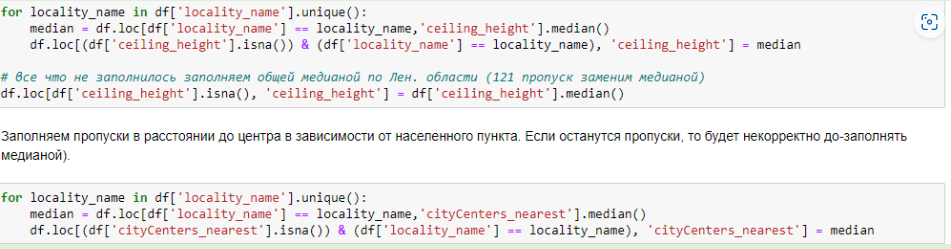
    
Если хочешь - дарю свой код =)
</div>

***Займемся пропусками в floors_total***

In [9]:
data['floors_total'].isna().sum()
#data.head(10)
#оставим всё как есть, так как невозможно определить чем заполнить пропуски

86

***Займемся пропусками в living_area***

In [10]:
data['living_area'].describe()
data['living_area'] = data['living_area'].fillna(30) 

***В столбце is_apartment пропуски предположительно должны быть заполнены значением False***

In [11]:
data['is_apartment'] = data['is_apartment'].fillna(False)

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Верно, ведь это булевый столбец
</div>

***Займемся пропусками в kitchen_area***

In [12]:
data['kitchen_area'].describe()
data['kitchen_area'] = data['kitchen_area'].fillna(9.1)

***Займемся пропусками в balcony***

In [13]:
#предположем, что при заполнении числа балконов в местах пропусков должны были поставить 0. И изменим тип на int
data['balcony'] = data['balcony'].fillna(0).astype('int')

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Согласен, если пропуск - вероятнее всего балкон отсутствует

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Если пропусков меньше 5-10% их лучше сразу удалить, дабы сэкономить время

***В столбце столбце locality_name пропуски невозможно восстановить, заполним пропуски в других столбцах где это возможно***

In [14]:
#заполним пропуски значением ноль и изменим тип на int
data['days_exposition'] = data['days_exposition'].fillna(0).astype('int')

data['airports_nearest'].describe()
data['airports_nearest'] = data['airports_nearest'].fillna(26726)

data['cityCenters_nearest'].describe()  
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(0)

data['parks_around3000'].describe()
data['parks_around3000'] = data['parks_around3000'].fillna(0).astype('int')

data['parks_nearest'].describe()
data['parks_nearest'] = data['parks_nearest'].fillna(455) 

data['ponds_around3000'].describe()
data['ponds_around3000'] = data['ponds_around3000'].fillna(0).astype('int')

data['ponds_nearest'].describe()
data['ponds_nearest'] = data['ponds_nearest'].fillna(0)
#data.isna().sum()
#data.info()

***Вывод*** Мы восстановили некоторое количество данных насколько это возможно, но большая часть данных, которые важны для исследования, пропущенны по непонятным причинам, скорее всего ошибки ввода данных

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Не все столбцы имеют корректный тип данных. Например `parks_around3000` имеет дробный тип. Но ведь не может быть 2.5 парка рядом. Как думаешь?
</div>

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

In [16]:
data['locality_name'].nunique()

364

In [17]:
#неявные дубликаты в столбце locality_name
data['locality_name'].unique()
#видим, что есть проблемы с буквой е-ё в слове поселок(посёлок), исправляем этот недочет
data['locality_name'] = data['locality_name'].str.replace('поселок','посёлок')
#проверим количество дубликатов 
data['locality_name'].duplicated().sum()
#приведем зачения в столбце к нижнему регистру
data['locality_name'] = data['locality_name'].str.lower()

In [18]:
data['locality_name'].nunique()

330

<div class="alert alert-info"> <b>Комментарии студента:</b> Не пойму, почему количество уникальных значений не меняется после моих исправлений </div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

Почему не меняется? было 364, стало 330
</div>

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Нет решения по шагу 2.3 (неявные дубликаты)
</div>

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Нет решения по шагу 2.4 (аномалии)
</div>

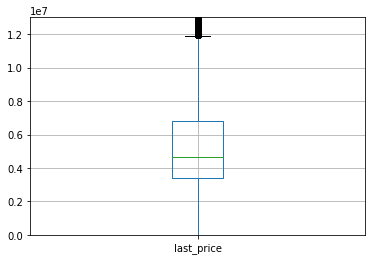

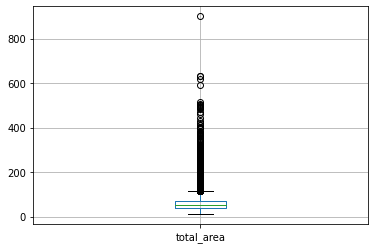

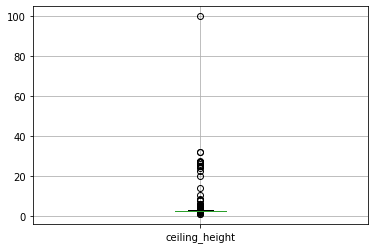

In [19]:
data.boxplot(column='last_price')
plt.ylim(0, 13000000)
plt.show()

data.boxplot(column='total_area')
plt.show()

data.boxplot(column='ceiling_height')
plt.show()
#изучил каждый столбец на наличие аномалий методом boxplot(), и пришел к выводу, что они есть 
#в столбцах last_price, total_area, ceiling_height
#удаляем аномалии в каждом столбцу
data.query('last_price > 700000000')
data = data.loc[data['last_price'] < 9000000]
data = data.loc[data['total_area'] < 100]
data['ceiling_height'].describe()
#вряд ли есть потолки выше 3 метров и ниже 2, поэтому подкорректируем данные
#заменим все значения, не находящиеся между 2 и 5 метров на медиану
data.loc[data['ceiling_height'] < 2, 'ceiling_height'] = 2.6
data.loc[data['ceiling_height'] > 3, 'ceiling_height'] = 2.6
# data.query('ceiling_height < 2 and ceiling_height > 5')['ceiling_height'].sum()

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

Чтобы разглядеть квантили и медиану, советую использовать метод ylim() или xlim(). Выше его применил, посмотри, пожалуйста, этот момент
</div>

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

Совет: Рекомендую не смотреть данные "на глаз". Лучше посмотреть на выбросы и аномалии данных математически, и удалить их (если они соответствуют здравому смыслу). В этом поможет метод boxplot()
</div>

In [20]:
#проверка на явные дубликаты
data.duplicated().sum()

0

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

Проверка на дубликаты - основа предобработки данных
</div>

***Вывод*** В ходе проверки и обработки данных были изменены типы данных там, где это было нужно, заполнены пропуски, где это было возможно. Но стоит сказать, что не мало данных были утеряны в процессе ввода данных. Это может сказаться на исследовании

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Отсутствует проверка на явные дубликаты, поправишь, пожалуйста?
    
---
    
Так же отсутствует вывод после раздела (можно описать качество исходных данных). Поправишь, этот момент в проекте?
</div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__
    
Второй раздел сделан хорошо. Проверены основные возможные проблемы в данных.

### Посчитайте и добавьте в таблицу новые столбцы

цену квадратного метра;


день недели, месяц и год публикации объявления;


этаж квартиры; варианты — первый, последний, другой;


соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [21]:
#добавляем столбец цена за квадратный метр, поделив цена на момент снятия с публикации
#на общую площадь квартиры и изменим тип на int
data['last_pr_per_area'] = data['last_price'] / data['total_area']
data['last_pr_per_area'] = data['last_pr_per_area'].astype('int')
#посчитаем среднюю цену за кв.м.
data['last_pr_per_area'].mean()

#добавляем столбецы дня недели, месяца и года
data['days_week_exposition'] = data['first_day_exposition'].dt.weekday
data['month_exposition'] = data['first_day_exposition'].dt.month
data['year_exposition'] = data['first_day_exposition'].dt.year
#посчитаем в каком году было больше всего объявлений
data['year_exposition'].value_counts()

#добавим столбец floor_category для категоризации этажей
last_floor = data.query('floors_total/floor == 1')
data['floor_category'] = data['floor']
data.loc[data['floor_category'] == 1, 'floor_category'] = 'Первый'
data.loc[last_floor.index, 'floor_category'] = 'Последний'
data.loc[(data['floor_category'] != 'Первый') & (data['floor_category']!='Последний'), 'floor_category'] = 'Другой'
#посчитаем количество объявлений для каждой категории
data['floor_category'].value_counts()

#соотношение жилой и общей площади, а также отношение площади кухни к общей
data['living_per_total'] = data['living_area'] / data['total_area']
data['kitch_per_total'] = data['kitchen_area'] / data['total_area']


#перевод в км расстояние до центра города
data['cityCenters_km'] = data['cityCenters_nearest'] / 1000
data['cityCenters_km'] = data['cityCenters_km'].round()
#data.head()

***Вывод*** Мы добавили новые столбцы, нужные нам для исследования. Посчитали среднюю стоимость квадратного метра - 100000 руб, посчитали, в каком году было больше всего объявлений - 2018, и с небольшой разницей 2017. Затем выеснили, что больше всего объявлений с квартирами между первым и последним, что логично.

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

Совет на будущие работы (в этом проекте этот метод не нужен): обычно в датафреймах содержатся данные за несколько лет. Важно выбрать корректный метод для вычленения месяца, иначе месяца разных годов могут стать одним месяцем. Обрати внимание на метод astype('datetime64[M]'). Для его использования не нужно обращаться к pd.DatetimeIndex. 
    
Вот хорошая статья на этот счёт: 
    
    https://runebook.dev/ru/docs/numpy/reference/arrays.datetime
    
    и
    
    https://stackoverflow.com/questions/70901855/get-hour-and-minutes-and-seconds-from-numpy-datetime64
</div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

Этот метод нужен для визуализации динамики по неделям, месяцам или годам (смотря какой метод выберешь)
    
Код выглядит так:
    
        df['first_day_exposition'].dt.date #приводим к временному формату
        df['first_day_exposition'].astype('datetime64[M]') 
    
Если года разные, то в новой колонке месяца у тебя отобразится первый день месяца ('2019-05-01')
</div>

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Нет решения по шагу брифа 3.6 (перевод в км и округление). Поправь, пожалуйста
</div>

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №2__

Лучше округлить до целого числа, врятли кто-то считает до цента 13км 750 метров
</div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №3__

Этот раздел выполнен качественно
</div>

### Проведите исследовательский анализ данных

***Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Построим гистограммы для каждого параметра***

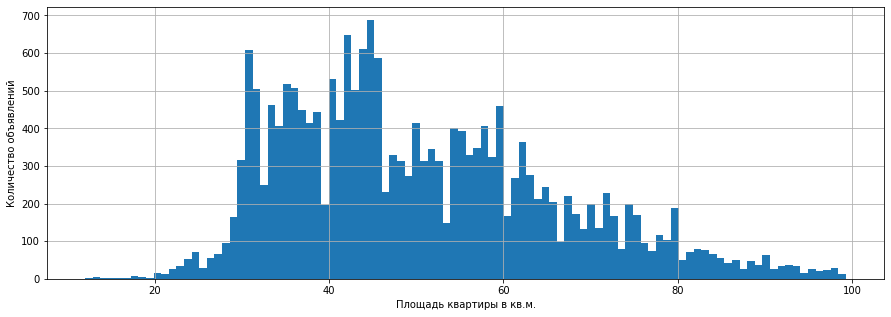

In [22]:
#площадь отсортируем по возрастанию и постороим гистограмму 
data['total_area'].sort_values().plot(kind='hist', y='total_area', bins=100, figsize=(15,5), grid=True)
plt.xlabel('Площадь квартиры в кв.м.')
plt.ylabel('Количество объявлений')
plt.show()

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

Отличный график
</div>

Больше объявлений в районе 46-47 кв.м.

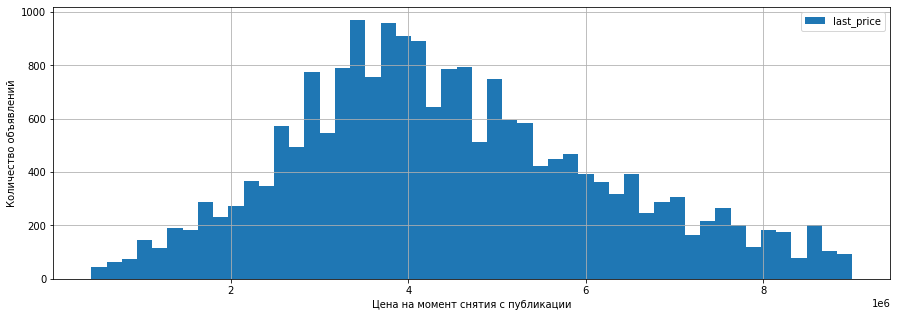

In [23]:
#цена
data.plot(kind='hist', y='last_price', grid=True, bins=50, figsize=(15,5))
plt.xlabel('Цена на момент снятия с публикации')
plt.ylabel('Количество объявлений')
plt.show()

Больше всего объявлений около 4 млн. руб.

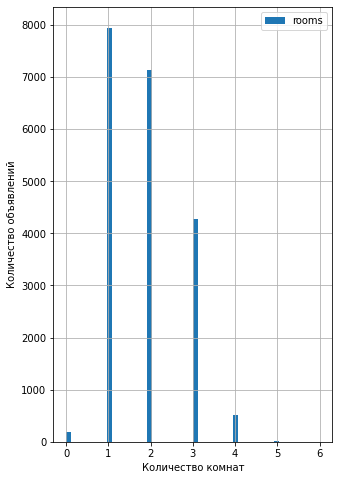

In [24]:
data.plot(kind='hist',y='rooms', grid=True, bins=50, figsize=(5,8))
plt.xlabel('Количество комнат')
plt.ylabel('Количество объявлений')
plt.show()

Больше всего объявлений однокомнатных квартир

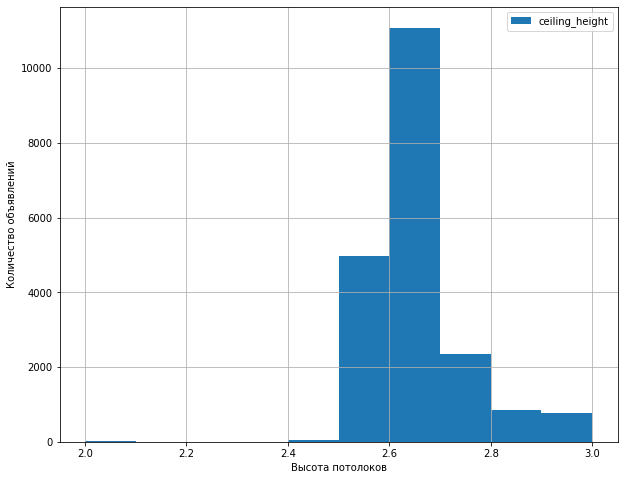

In [25]:
#высота потолков
data.plot(kind='hist', y='ceiling_height', grid=True, bins=10, figsize=(10,8))
plt.xlabel('Высота потолоков')
plt.ylabel('Количество объявлений')
plt.show()

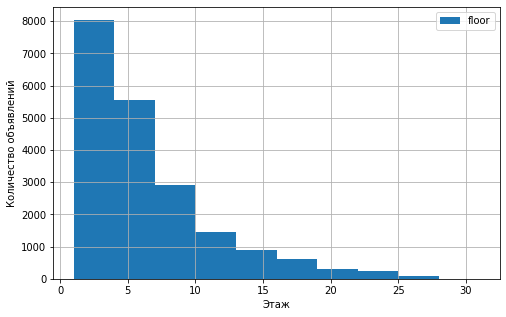

In [26]:
#этаж квартиры
data.plot(kind='hist', y='floor', grid=True, bins=10, figsize=(8,5))
plt.xlabel('Этаж')
plt.ylabel('Количество объявлений')
plt.show()

Больше всего объявлений между 1 и 4 этажами

<AxesSubplot:>

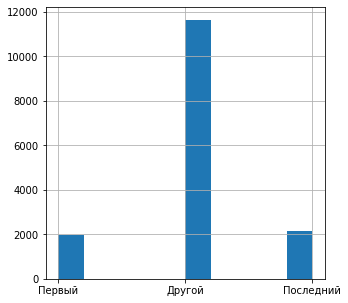

In [173]:
#тип этажа квартиры («первый», «последний», «другой»)
data['floor_category'].hist(bins=10, figsize=(5,5))
#долго ломал голову как изобразить столбец floor_category. из прошлых уроков нашел вот такой метод пирога, вроде получилось

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №3__

В целом всё верно, молодец. Но по ТЗ нам нужно построить гистограмму. Поправь, пожалуйста
</div>

<div class="alert alert-info"> <b>Комментарии студента:</b> У меня почему то не получилось построить гистограмму по этому столбцу. Решение от меня ускользает. Часто я придумываю что то мудреное, а на деле оказывается, что нужно проще </div>

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №4__

Попробуй, вот такой метод:
    
    df[].hist()
</div>

<div class="alert alert-info"> <b>Комментарии студента:</b> Как я и говорил, самый простой способ от меня ускользает) Спасибо большое за проверки, за правки, так намного легче учиться, усвоил всё то, что не дала мне теория. Мне интересно, какой у вас часовой пояс, а то у меня час ночи) </div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №5__

Здорово, что разобрались) У меня по мск, 2 часа ^^))) Выспимся на пенсии))
</div>

Как и ожидалось больше всего объявлений в категории "другой"

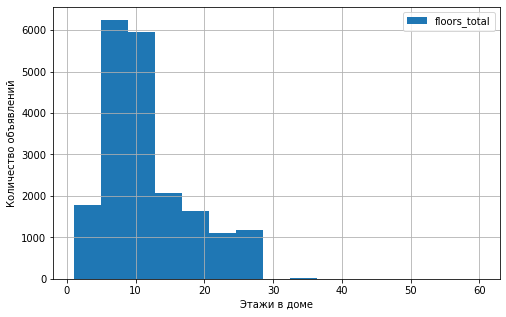

In [28]:
#общее количество этажей в доме
data.plot(kind='hist', y='floors_total', grid=True, bins=15, figsize=(8,5))
plt.xlabel('Этажи в доме')
plt.ylabel('Количество объявлений')
plt.show()

Больше всего объявлений около 10 этажей в доме

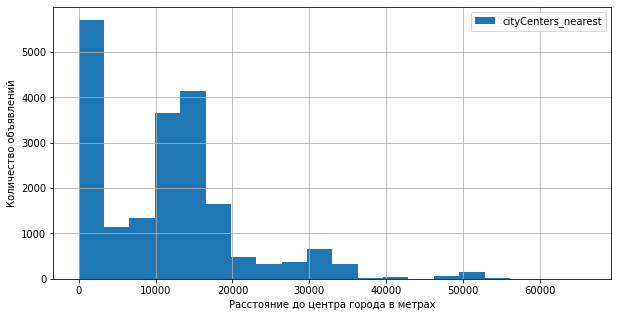

In [29]:
#расстояние до центра города в метрах
data.plot(kind='hist', y='cityCenters_nearest', grid=True, bins=20, figsize=(10,5))
plt.xlabel('Расстояние до центра города в метрах')
plt.ylabel('Количество объявлений')
plt.show()

Чем ближе к центру, тем больше объявлений

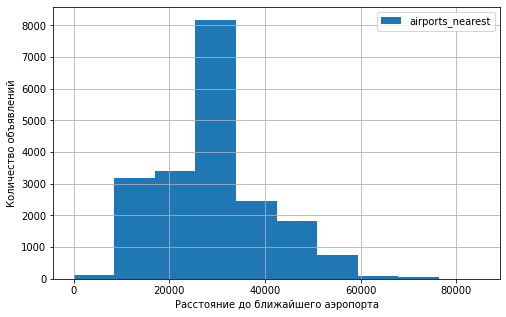

In [30]:
#расстояние до ближайшего аэропорта
data.plot(kind='hist', y='airports_nearest', grid=True, bins=10, figsize=(8,5))
plt.xlabel('Расстояние до ближайшего аэропорта')
plt.ylabel('Количество объявлений')
plt.show()

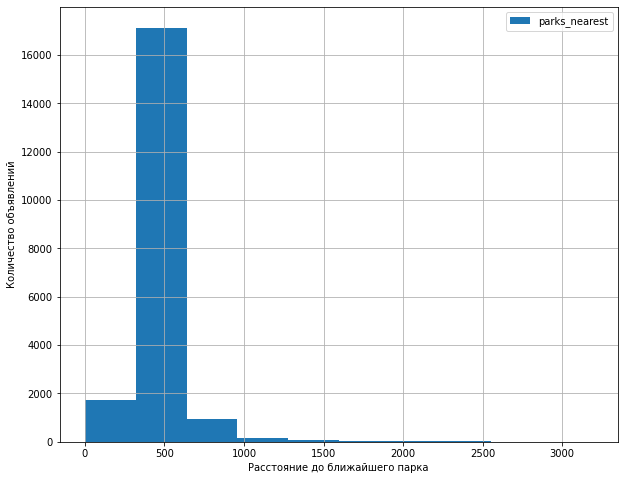

In [31]:
#расстояние до ближайшего парка
data.plot(kind='hist', y='parks_nearest', grid=True, bins=10, figsize=(10,8))
plt.xlabel('Расстояние до ближайшего парка')
plt.ylabel('Количество объявлений')
plt.show()

Больше всего объявлений около 500 м.

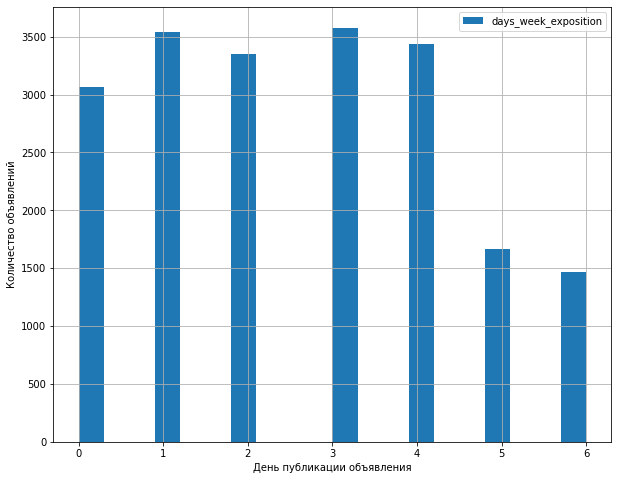

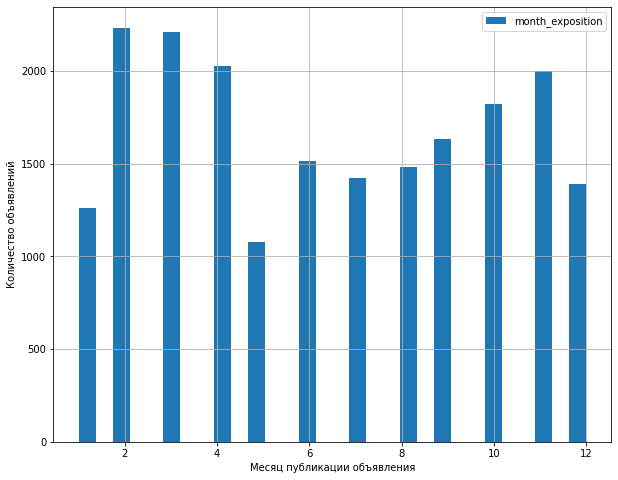

In [32]:
#день и месяц публикации объявления
data.plot(kind='hist', y='days_week_exposition', grid=True, bins=20, figsize=(10,8))
plt.xlabel('День публикации объявления')
plt.ylabel('Количество объявлений')
plt.show()

data.plot(kind='hist', y='month_exposition', grid=True, bins=30, figsize=(10,8))
plt.xlabel('Месяц публикации объявления')
plt.ylabel('Количество объявлений')
plt.show()

Больше всего объявлений публикуется в четверг, и в феврале

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №2__

Рассмотрены не все пункты, поправь, пожалуйста
</div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №3__

В мае не до продаж, все на огородах =)
</div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Ратмир, смотри:
    
1) Шаг 4.1 нам нужно построить именно гистограмму по каждому пункту шага 4.1. Вот хорошая статья на этот счёт
    
    https://habr.com/ru/post/470535/
    
2) Шаг 4.2 - ответить на вопрос, какие продажи долгие, а какие - нет
    
3) Шаг 4.3 - построить графики зависимостей. Например есть данные (площади) мы их не можем сгруппировать, т.к. у каждого своя площадь, и зависимость от итоговой цены, лучше рассмотреть через тип графика scatter. А остальные зависимости - лучше через столбчатую или линейную диаграмму
    
Также, ты всегда можешь обратится к своему наставнику по проектам, он тебе сможет помочь в режиме диалога с проектом. А я уже проверю его на корректность. А по поводу теории - наставник по теории всегда придет на помощь, не стесняйся спрашивать его, чего не знать - это нормально
</div>

***Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней "висело"***

Проверим столбец на выбросы 

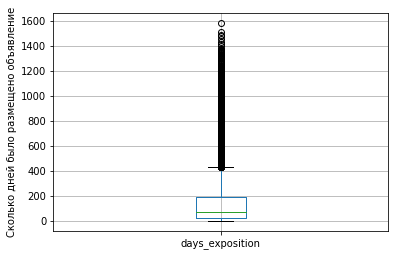

In [33]:
data.boxplot('days_exposition')
plt.ylabel('Сколько дней было размещено объявление')
plt.show()

1600 дней - это слишком много. Нужно отсеч значения от 220, например.

In [34]:
data = data.loc[data['days_exposition'] < 220]

In [35]:
data['days_exposition'].describe()

count    15779.000000
mean        64.301603
std         58.725488
min          0.000000
25%         14.000000
50%         46.000000
75%        100.000000
max        219.000000
Name: days_exposition, dtype: float64

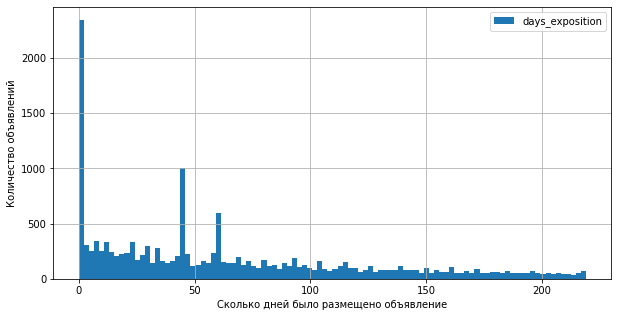

In [36]:
data.plot(kind='hist',y='days_exposition', bins=100, grid=True, figsize=(10,5))

plt.xlabel('Сколько дней было размещено объявление')
plt.ylabel('Количество объявлений')
plt.show()

***Вывод***
В среднем квартиры продаются за 64 дня. Есть множество факторов, которые способствуют быстрой или медленной продаже. Наиболее значимые факторы - площадь, расстояние до центра, количество комнат, цена. Дольше всех "висят" объявления со специфическими показателями этих факторов.


<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Немного не так, чтобы ответить на вопрос "Какие продажи можно считать быстрыми, а какие — необычно долгими?" лучше посмотреть на распределение данных с помощью boxplot() или describe().
    
---
    
Также откуда ты взял число 64?
</div>

<div class="alert alert-info"> <b>Комментарии студента:</b> Через describe() посчитал среднее значение столбца days_exposition, там выше есть </div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №4__

Хорошо, проглядел, моя вина(
</div>

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №4__

Какие продажи можно считать быстрыми, а какие — необычно долгими?
</div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №5__

Согласен)
</div>

***Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы.***



Зависимость цены от площади, жилой площади и площади кухни

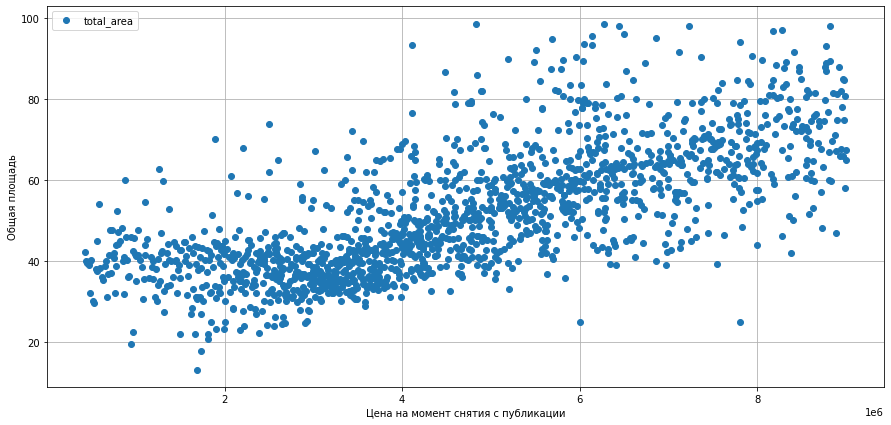

In [37]:
#найдем зависимость цены от общей площади
(data
    
     .pivot_table(index='last_price', values='total_area')
     .plot(style='o',grid=True, figsize=(15, 7))
)
plt.xlabel('Цена на момент снятия с публикации')
plt.ylabel('Общая площадь')
plt.show()


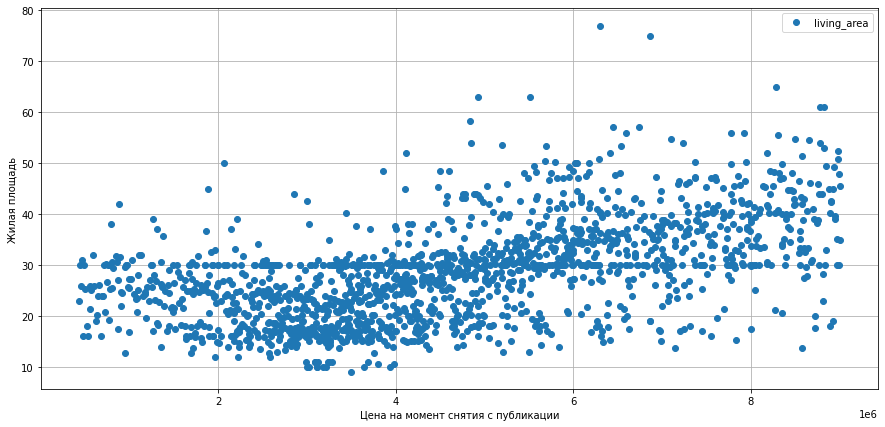

In [38]:
#найдем зависимость цены от жилой площади
(data
    
     .pivot_table(index='last_price', values='living_area')
     .plot(style='o',grid=True, figsize=(15, 7))
)
plt.xlabel('Цена на момент снятия с публикации')
plt.ylabel('Жилая площадь')
plt.show()

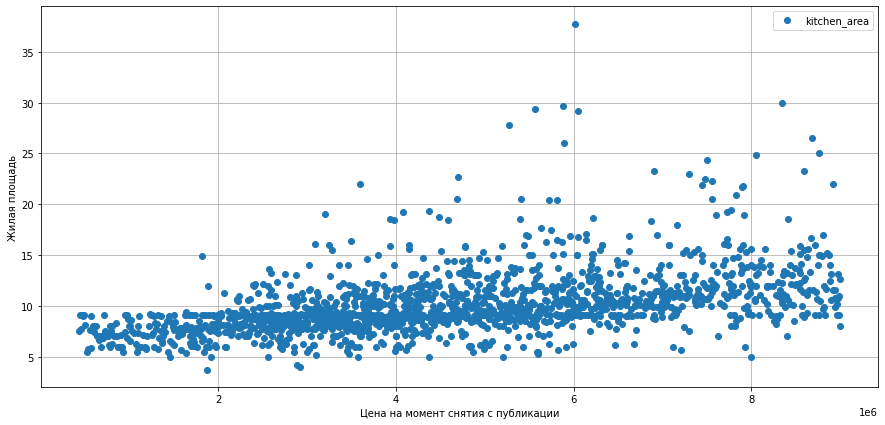

In [39]:
#найдем зависимость цены от площади кухни
(data
    
     .pivot_table(index='last_price', values='kitchen_area')
     .plot(style='o',grid=True, figsize=(15, 7))
)
plt.xlabel('Цена на момент снятия с публикации')
plt.ylabel('Жилая площадь')
plt.show()

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №2__

Технически корректно, но давай каждый пункт рассмотрим раздельно. График сильно перегружен информацией (и площадь кухни практически не видно). Лучше 1 график = одна мысль
</div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №3__

Спасибо за правки
</div>

Зависимость очевидна: чем больше площадь, тем выше цена. Зависимость уменьшается от общей площади к площади кухни. Посмотрим на корреляцию

In [40]:
data['total_area'].corr(data['last_price']) #зависимость общей площади от цены видна и тут, чем больше площать, тем выше цена

0.6202822759640213

In [41]:
data['living_area'].corr(data['last_price'])#зависимость цены от живой площади чуть меньше

0.4655962812042928

In [42]:
data['kitchen_area'].corr(data['last_price'])#зависимость цены от площади кухни еще меньше, но она есть

0.3787542083115259

***Вывод*** Коэффицент корреляции Пирсона в каждом показателе положителен, следовательно при увеличении одной велечины увеличивается и другая

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №3__

Верная интерпретация значений корреляции Пирсона. Ты молодец =)
</div>

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №2__

Отсутствует интерпретация корреляции Пирсона
</div>

Зависимость цены от количество комнат

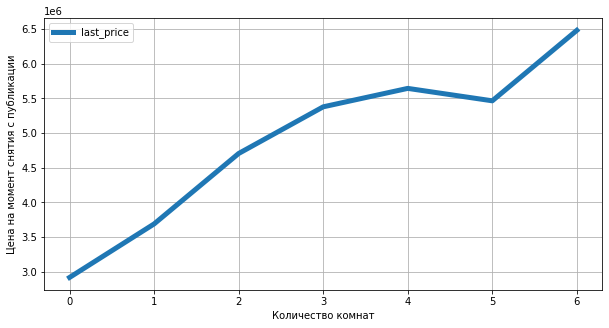

In [43]:
#найдем зависимость цены от 
(data
     .pivot_table(index='rooms', values='last_price')
     .plot(grid=True, figsize=(10, 5),linewidth=5)
)
plt.xlabel('Количество комнат')
plt.ylabel('Цена на момент снятия с публикации')
plt.show()

***Вывод*** От роста количества комнат растет и цена, но есть небольшой спад на 5 комнатах

Зависимость цены от типа этажа, на котором расположена квартира (первый, последний, другой)

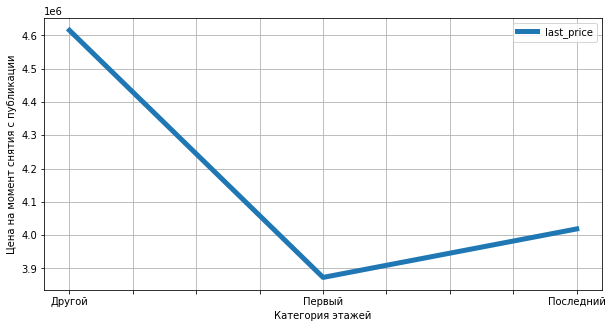

In [44]:
(data
     .pivot_table(index='floor_category', values='last_price')
     .plot(grid=True, figsize=(10, 5),linewidth=5)
)
plt.xlabel('Категория этажей')
plt.ylabel('Цена на момент снятия с публикации')
plt.show() 

***Вывод*** Самые дешевые квартиры на первом этаже, чуть дороже на последнем, а самые дорогие остальные этажи

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

Как в песне, "первый и последний этаж не предлагать". Традиционно, квартиры на первом и последнем этажах считаются самыми неудобными для жизни и это отражается на их стоимости.
</div>

Зависимость цены от даты размещения (день недели, месяц, год)

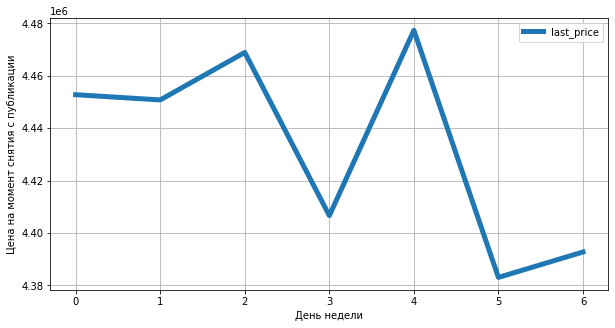

In [45]:
#день
(data
    
     .pivot_table(index='days_week_exposition', values='last_price')
     .plot(grid=True, figsize=(10, 5),linewidth=5)
)
plt.xlabel('День недели')
plt.ylabel('Цена на момент снятия с публикации')
plt.show()

***Вывод*** Самые высокие цены в пятницу, а самые низкие - в субботу

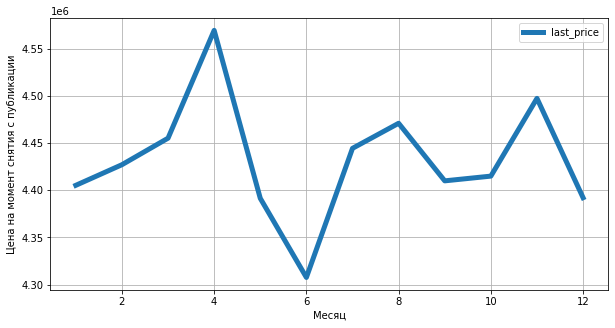

In [46]:
#месяц
(data
    
     .pivot_table(index='month_exposition', values='last_price')
     .plot(grid=True, figsize=(10, 5),linewidth=5)
)
plt.xlabel('Месяц')
plt.ylabel('Цена на момент снятия с публикации')
plt.show()

***Вывод*** Самые высокие цены в апреле, а самые низкие в июне

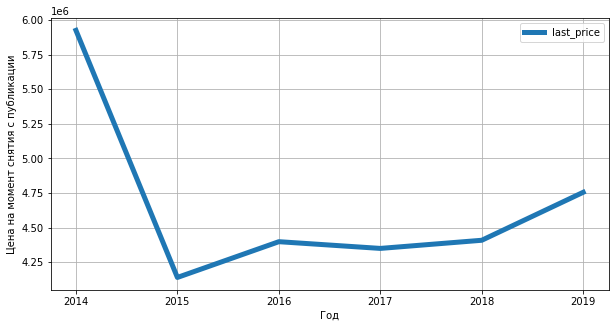

In [47]:
#год
(data
    
     .pivot_table(index='year_exposition', values='last_price')
     .plot(grid=True, figsize=(10, 5),linewidth=5)
)
plt.xlabel('Год')
plt.ylabel('Цена на момент снятия с публикации')
plt.show()

***Вывод*** Резкое падение цены наблюдается с 2014 до 2015, но затем постепенный рост

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

Давай рассмотрим динамику цены и площади продаваемых квартир. И потом пересмотрим выводы, т.к., возможно, упала не столько цена, сколько площадь продаваемых квартир?
</div>

***Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name***

In [48]:
data_10_city = data.pivot_table(index = 'locality_name', values = 'last_pr_per_area', aggfunc=['count', 'mean'])
data_10_city.columns = ['count', 'mean']
data_10_city = data_10_city.sort_values('count', ascending = False).head(10)
data_10_city

,count,mean
locality_name,,
санкт-петербург,9775,104246.424859
посёлок мурино,449,86282.694878
посёлок шушары,341,79046.029326
всеволожск,280,66976.032143
колпино,273,75515.761905
посёлок парголово,252,90138.869048
пушкин,233,99127.772532
гатчина,226,68940.477876
деревня кудрово,217,92576.483871


In [49]:
data_10_city[data_10_city['mean']==data_10_city['mean'].max()]#населенный пункт с самой высокой стоимостью кв.м.

,count,mean
locality_name,,
санкт-петербург,9775,104246.424859


In [50]:
data_10_city[data_10_city['mean']==data_10_city['mean'].min()]#населенный пункт с самой низкой стоимостью кв.м.

,count,mean
locality_name,,
выборг,176,59019.210227


***Вывод*** Из топ 10 населенных пунктов с наибольшим числом объявлений самая высокая стоимость кв. м. в Санкт-Петербурге, а самая низкая - в Выборге 

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Давай также выведем таблицу ТОП-10
</div>

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №3__

Таблица верна. Совет: на общие продажи лучше смотреть через призму медианы. Она более устойчива к выбросам
</div>

***Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.***


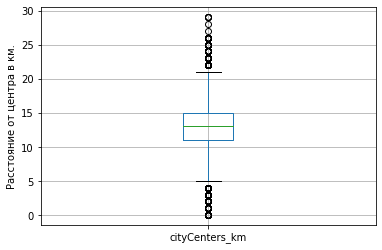

In [51]:
#создадим новый датофрейм, выделив Санкт-Петербург
spb_data = data.loc[data['locality_name'] == 'санкт-петербург']
#постороим диаграмму размаха удаления от центра в км
spb_data.boxplot('cityCenters_km')
plt.ylabel('Расстояние от центра в км.')
plt.show()

Не думаю, что расстояние дальше 20 км нужно рассматривать

In [52]:
spb_data = spb_data.loc[spb_data['cityCenters_km'] < 20]
#посчитаем среднюю цену каждого км
spb_price_mean = spb_data['last_price'].sum() / spb_data['cityCenters_km'].sum()
print(f'Средняя цена за км.: {spb_price_mean.round()} руб')

Средняя цена за км.: 421405.0 руб


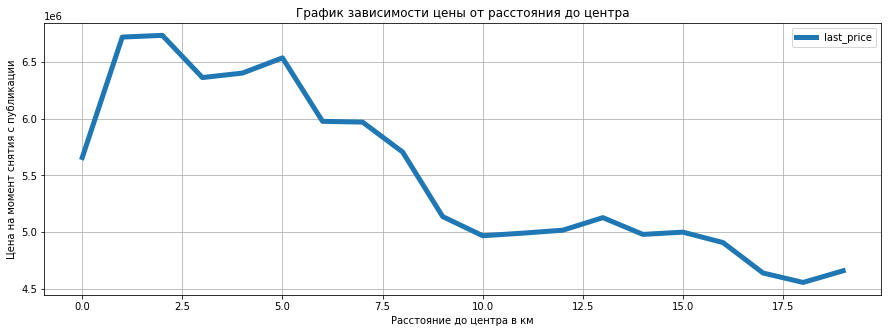

In [53]:
#построим график зависимости цены от расстояния до центра
spb_data.pivot_table(index='cityCenters_km', values='last_price', aggfunc='mean').plot(figsize=(15,5), grid=True, linewidth=5)
plt.xlabel('Расстояние до центра в км')
plt.ylabel('Цена на момент снятия с публикации')
plt.title('График зависимости цены от расстояния до центра')
plt.show()

***Вывод*** По этому графику мы видим сколько стоит каждые км. и вполне логично, что чем дальше от центра, тем цена выше 

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Смотри, давай сделаем сводную таблицу (удалённость в км от центра Питера, и средняя цена на этом км). И уже по этой сводной таблице построим линейную или столбчатую диграмму для визуализации динамики цены относительно удалённости
</div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №3__

Отличная визуализация. В твой код добавил заголовок, посмотри, пожалуйста, этот момент. Очень важно оформлять графики
</div>

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №1__

Отсутствует финальный вывод. Поправь, пожалуйста
</div>

<div class="alert alert-block alert-warning">📝
Комментарий от ревьюера №1 </b> 



У тебя получилась очень сильная и хорошая работа. Здорово, что расчеты ты сопровождаешь иллюстрациями, а так же не забываешь про комментарии, твой проект интересно проверять. 

---

Нужно поправить:

1) Округление

2) Шаг 4.1 рассмотрены не все пункты

3) Какие продажи можно считать быстрыми, а какие — необычно долгими?

4) Шаг 4.3 рассмотреть площади раздельно

5) ПИнтерпретация корреляции Пирсона

6) ТОП-10

7) В последнем шаге добавить линейную или столбчатую диаграмму

8) Подправить выводы, после изменений

----


Если у тебя будут какие-то вопросы по моим комментариям - обязательно пиши! Буду ждать работу на повторное ревью :)</div>

### Общий вывод

Переходим к общим выводам по данному проекту. Мы провели исследование базы данных объявлений недвижимости. В ходе нашей работы мы изучили содержимое базы данных, заполнили все пропуски, где это возможно. Убрали явные и неявные дубликаты, избавились от аномалий, подправили типы данных, добавили нужные нам новые столбцы для удобства расчетов. Изучив факторы, влияющие на цену недвижимости мы пришли к выводу, что наибольшее влияние на стоимость имеют: площадь, расстояние от центра, количество комнат.
Так же мы заметили тот факт, что цены постепенно идут вверх с 2015 года. Есть проблемы с данными на этапе выгрузки, множетво потерянных значений, важных для исследования, о которых нужно сообщить.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №3__

Шикарный вывод и рекомендации для бизнеса. Кстати, хорошей практикой является написание в общем выводе всех твоих действий (кратко) по проекту. Ведь вывод раскрывает для заказчика всю твою проделанную работу и за что он платит деньги, даже если ему не интересен весь процесс исследования, то в отчёт он заглянет обязательно. Ты молодец!
</div>

<div class="alert alert-block alert-warning">📝
Комментарий от ревьюера №3 </b> 



Отличная работа, осталось поправить пару моментов:

---

Нужно поправить:


1) Шаг 4.1 (гистограмма по типу этажа)

2) Какие продажи можно считать быстрыми, а какие — необычно долгими?

3) Подправить выводы, после изменений

----


Если у тебя будут какие-то вопросы по моим комментариям - обязательно пиши! Буду ждать работу на повторное ревью :)</div>

<div class="alert alert-block alert-warning">📝
Комментарий от ревьюера №4 </b> 




---

Нужно поправить:


1) Шаг 4.1 (гистограмма по типу этажа)

2) Какие продажи можно считать быстрыми, а какие — необычно долгими?

3) Подправить выводы, после изменений

----


Если у тебя будут какие-то вопросы по моим комментариям - обязательно пиши! Буду ждать работу на повторное ревью :)</div>

<div style="border:solid blue 3px; padding: 20px">
<div class="alert alert-block alert-success">✔️
    

__Коментарий от ревьюера №5__


В остальном всё чудно😊. Твой проект так и просится на github =)   
    
Поздравляю с успешным завершением проекта 😊👍
И желаю успехов в новых работах 😊
    
---
    
От себя хочу порекомендовать тебе отличную книгу про язык Python. Она очень классная (можно купить как новую, так и на Авито попадается. Вот ссылка на pdf этой книги)
    
https://monster-book.com/avtomatizaciya-zadach-s-python
</div>

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод